In [1]:
pip install dascore

Note: you may need to restart the kernel to use updated packages.


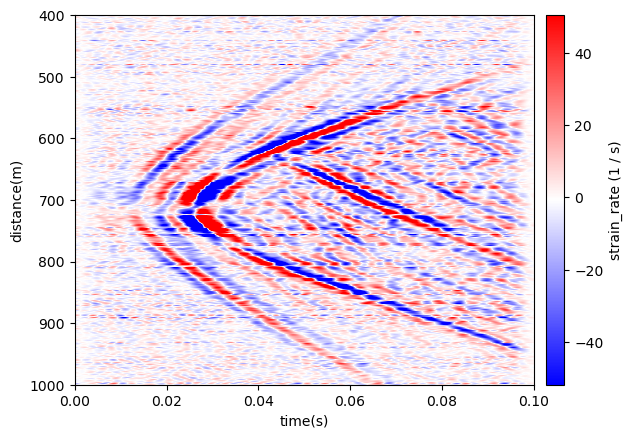

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import dascore as dc
from dascore.utils.downloader import fetch

def staltatrigger(timeseries, samplingrate, stawindowduration, 
                  ltawindowduration, stepsizeduration):
    """Implementing the STA/LTA method for seismic event detection."""

    stawindowlength = int(stawindowduration * samplingrate)
    ltawindowlength = int(ltawindowduration * samplingrate)
    stepsizesample = int(stepsizeduration * samplingrate)

    stavalues = np.empty(len(timeseries) - ltawindowlength)
    ltavalues = np.empty(len(timeseries) - ltawindowlength)
    ratio = np.zeros(len(timeseries) - ltawindowlength)

    for i in range(ltawindowlength, len(timeseries) - stawindowlength, stepsizesample):
        stastart = i
        staend = i + stawindowlength
        ltastart = i - ltawindowlength
        ltaend = i

        stavalues[i - ltawindowlength] = np.mean(np.abs(timeseries[stastart:staend]))
        ltavalues[i - ltawindowlength] = np.mean(np.abs(timeseries[ltastart:ltaend]))
        ratio[i - ltawindowlength] = stavalues[i - ltawindowlength] / ltavalues[i - ltawindowlength]

    return stavalues, ltavalues, ratio

# Fetch and process example DAS data
patch = dc.get_example_patch('random_das')

out = (
    patch.decimate(time=8)
    .detrend(dim='distance')
    .pass_filter(time=(..., 10))
)
directory_path = fetch('terra15_das_1_trimmed.hdf5').parent

spool = (
    # Create a spool to interact with directory data
    dc.spool(directory_path)
    # Index the directory contents
    .update()
    # Sub-select a specific time range
    .select(time_min=('2020-01-01', ...))
    # Specify chunk of the output patches
    .chunk(time=60, overlap=10)
)
spool = dc.get_example_spool('diverse_das')

# Spools are like lists, you can get patches through iteration
for patch in spool:
    ...

# or through indexing
patch = spool[0]
#perform processing 
patch = dc.get_example_patch('random_das')

out = (
    # Decimate along time axis (keep every 8th sample)
    patch.decimate(time=8)
    # Detrend along the distance dimension
    .detrend(dim='distance') 
    # Apply 10Hz low-pass filter along time dimension
    .pass_filter(time=(..., 10))
)
patch = dc.get_example_patch('example_event_2')

patch.viz.waterfall(show=True, scale=0.2);

